In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from scipy.stats import zscore,skew
import warnings
warnings.filterwarnings("ignore")
import json
import pickle

### problem statement 

### Data Gathering

In [204]:
df=pd.read_csv("Sales_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [205]:
df.shape

(8523, 12)

### EDA

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [207]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### 1.Item_Identifier

In [208]:
df["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [209]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [210]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

#### 2.Item_Weight

In [211]:
df["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [212]:
df["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [213]:
df["Item_Weight"].isna().sum()

1463

In [214]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:>

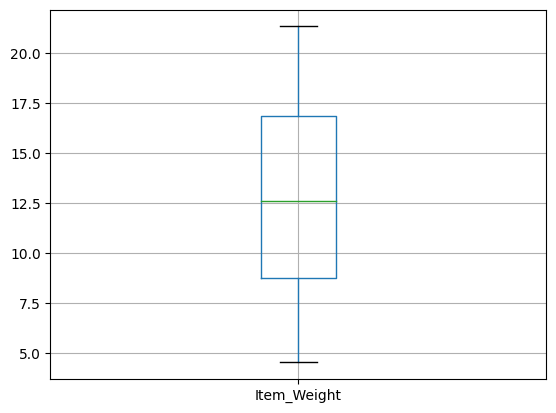

In [215]:
df[["Item_Weight"]].boxplot()

In [216]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].median())

In [217]:
df["Item_Weight"].isna().sum()

0

In [218]:
#### using around function to reduce the memory size of dataset
#df["Item_Weight"]=df["Item_Weight"].apply(lambda x:round(x,2))

#### 3.Item_Fat_Content 

In [219]:
df["Item_Fat_Content"]

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [220]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [221]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [222]:
df["Item_Fat_Content"].value_counts().to_dict()

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [223]:
df["Item_Fat_Content"].isna().sum()

0

In [224]:
## here done the lable encoding
df["Item_Fat_Content"].replace({'Low Fat': 1, 'Regular': 0, 'LF': 1, 'reg': 0, 'low fat': 1},inplace=True)

In [225]:
df["Item_Fat_Content"].value_counts()

1    5517
0    3006
Name: Item_Fat_Content, dtype: int64

In [226]:
Item_Fat_Content_value={'Low Fat': 1, 'Regular': 0, 'LF': 1, 'reg': 0, 'low fat': 1}

#### 4.Item_Visibility

In [227]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [228]:
df["Item_Visibility"].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [229]:
df["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [230]:
df["Item_Visibility"].isna().sum()

0

#### 5.Item_Type

In [231]:
df["Item_Type"]

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [232]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [233]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [234]:
df["Item_Type"].value_counts().to_dict()

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [235]:
df["Item_Type"].replace({'Fruits and Vegetables': 1,
 'Snack Foods': 2,
 'Household': 3,
 'Frozen Foods': 4,
 'Dairy': 5,
 'Canned': 6,
 'Baking Goods': 7,
 'Health and Hygiene': 8,
 'Soft Drinks': 9,
 'Meat': 10,
 'Breads': 11,
 'Hard Drinks': 12,
 'Others': 13,
 'Starchy Foods': 14,
 'Breakfast': 15,
 'Seafood': 16},inplace=True)

In [236]:
Item_Type_value={'Fruits and Vegetables': 1,
 'Snack Foods': 2,
 'Household': 3,
 'Frozen Foods': 4,
 'Dairy': 5,
 'Canned': 6,
 'Baking Goods': 7,
 'Health and Hygiene': 8,
 'Soft Drinks': 9,
 'Meat': 10,
 'Breads': 11,
 'Hard Drinks': 12,
 'Others': 13,
 'Starchy Foods': 14,
 'Breakfast': 15,
 'Seafood': 16}

In [237]:
df["Item_Type"].value_counts()

1     1232
2     1200
3      910
4      856
5      682
6      649
7      648
8      520
9      445
10     425
11     251
12     214
13     169
14     148
15     110
16      64
Name: Item_Type, dtype: int64

#### 6.Item_MRP

In [238]:
df["Item_MRP"]

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

In [239]:
df["Item_MRP"].unique()

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

In [240]:
df["Item_MRP"].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [241]:
df["Item_MRP"].isna().sum()

0

#### 7.Outlet_Identifier

In [242]:
df["Outlet_Identifier"]

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [243]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [244]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [245]:
df=pd.get_dummies(df,columns=["Outlet_Identifier"])

#### 8.Outlet_Size

In [246]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [247]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [248]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [249]:
df["Outlet_Size"].value_counts().to_dict()

{'Medium': 2793, 'Small': 2388, 'High': 932}

In [250]:
df["Outlet_Size"].isna().sum()

2410

In [251]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)

In [252]:
df["Outlet_Size"].replace({'Medium': 1, 'Small': 2, 'High': 3},inplace=True)

In [253]:
Outlet_Size_value={'Medium': 1, 'Small': 2, 'High': 3}

#### 9.Outlet_Location_Type

In [254]:
df["Outlet_Location_Type"]

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [255]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [256]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df["Outlet_Location_Type"].value_counts().to_dict()

In [132]:
df["Outlet_Location_Type"].isna().sum()

0

In [133]:
df["Outlet_Location_Type"].replace({'Tier 3': 1, 'Tier 2': 2, 'Tier 1': 3},inplace=True)

In [134]:
Outlet_Location_Type_value={'Tier 3': 1, 'Tier 2': 2, 'Tier 1': 3}

In [135]:
df["Outlet_Location_Type"].value_counts()

1    3350
2    2785
3    2388
Name: Outlet_Location_Type, dtype: int64

#### 9.Outlet_Type

In [136]:
df["Outlet_Type"]

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [137]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [138]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [139]:
df["Outlet_Type"].value_counts().to_dict()

{'Supermarket Type1': 5577,
 'Grocery Store': 1083,
 'Supermarket Type3': 935,
 'Supermarket Type2': 928}

In [140]:
df["Outlet_Type"].replace({'Supermarket Type1': 1,
 'Grocery Store': 2,
 'Supermarket Type3': 3,
 'Supermarket Type2': 4},inplace=True)

In [141]:
Outlet_Type_value={'Supermarket Type1': 1,
 'Grocery Store': 2,
 'Supermarket Type3': 3,
 'Supermarket Type2': 4}

#### 10.Item_Outlet_Sales

In [142]:
df["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [143]:
df["Item_Outlet_Sales"].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [144]:
df["Item_Outlet_Sales"].isna().sum()

0

In [145]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Outlet_Identifier_OUT010   8523 non-null   uint8  
 12  Outlet_Identifier_OUT013   8523 non-null   uint8  
 13  Outlet_Identifier_OUT017   8523 non-null   uint8

<AxesSubplot:>

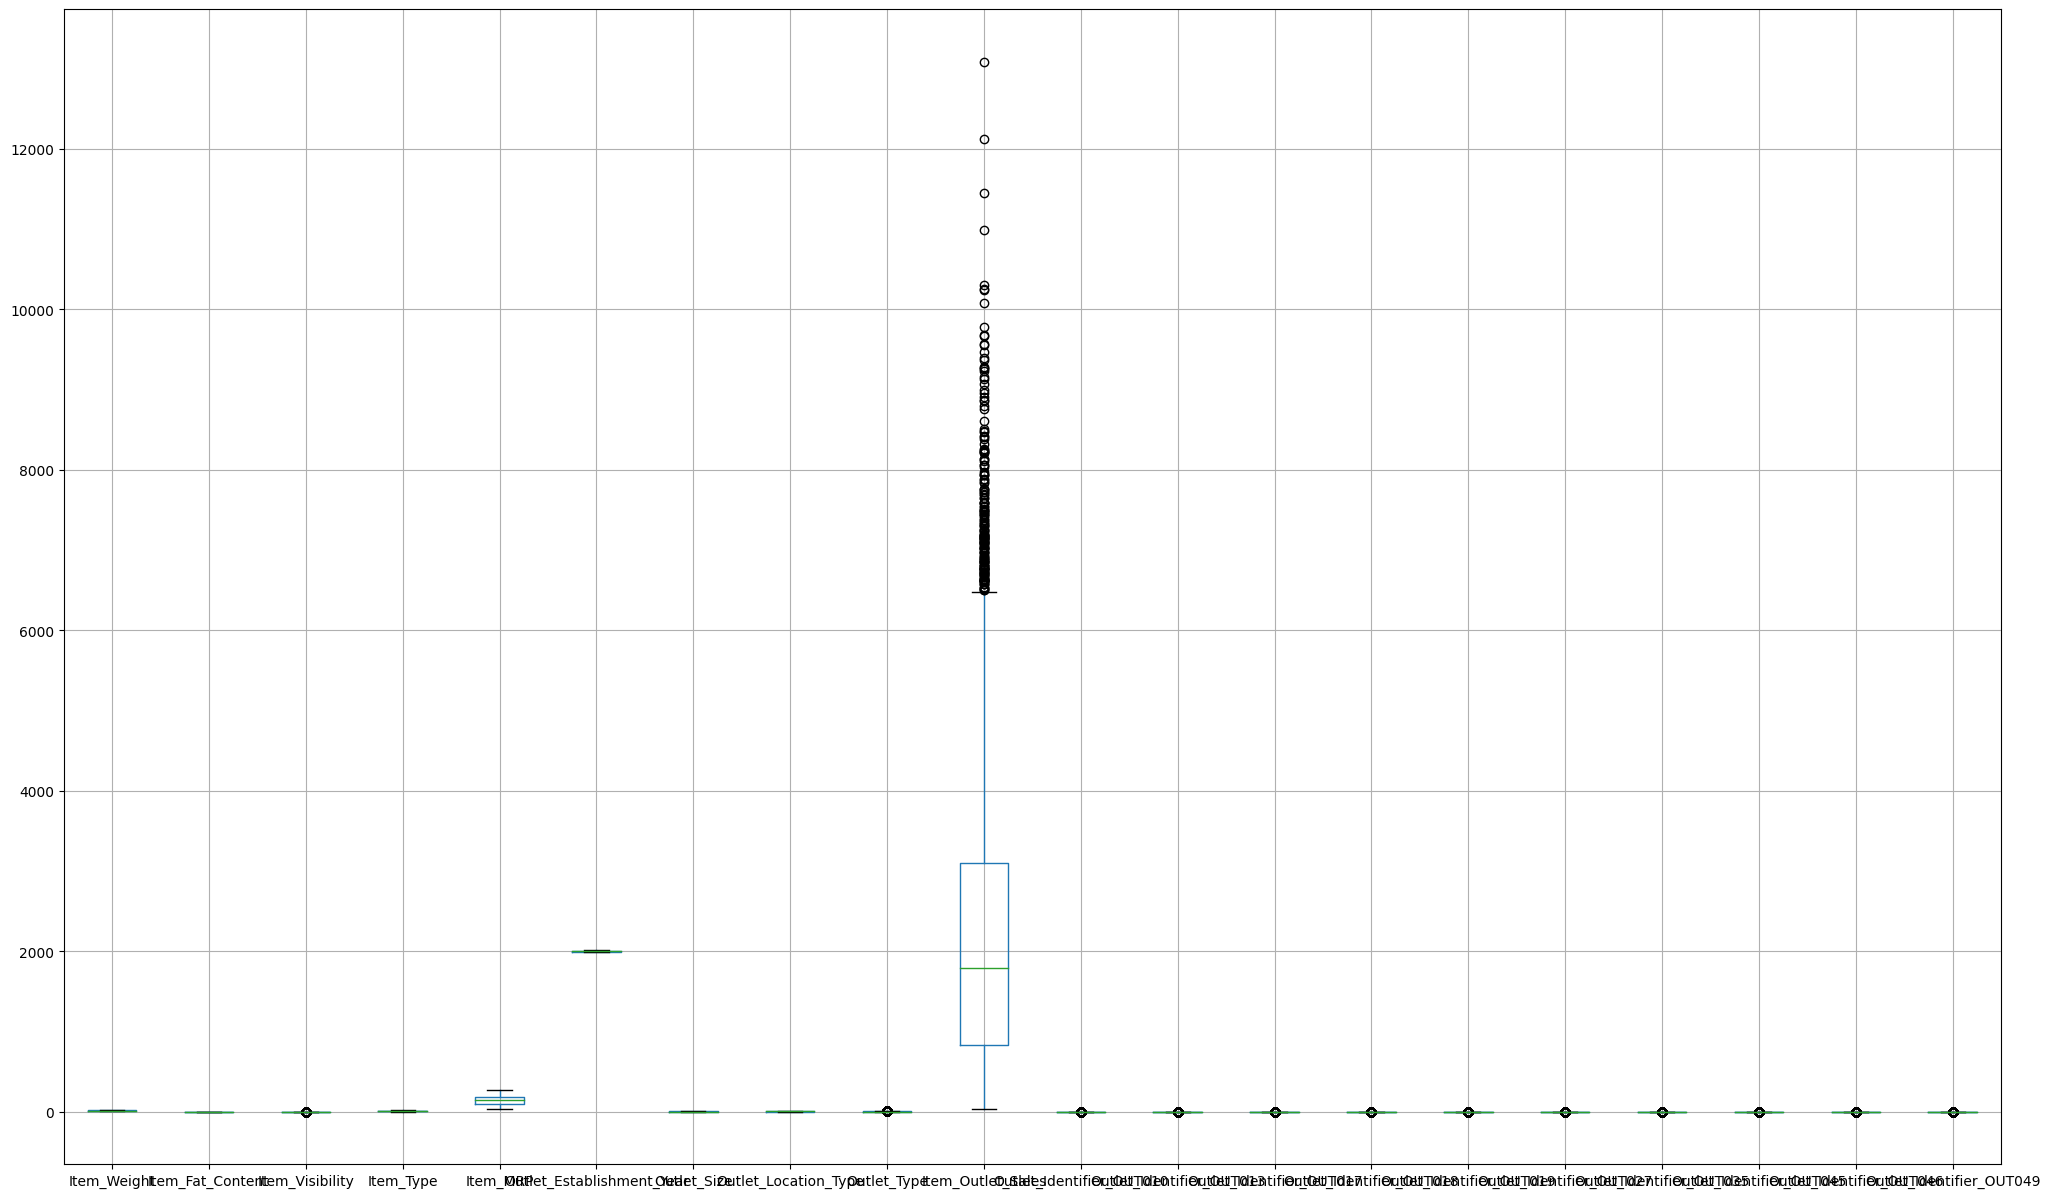

In [146]:
plt.figure(figsize=(25,15))
df.boxplot()

In [148]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,1,0.016047,5,249.8092,1999,1,3,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0,0.019278,9,48.2692,2009,1,1,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,1,0.016760,10,141.6180,1999,1,3,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0,0.000000,1,182.0950,1998,1,1,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,1,0.000000,3,53.8614,1987,3,1,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,2,214.5218,1987,3,1,1,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0,0.046982,7,108.1570,2002,1,2,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,1,0.035186,8,85.1224,2004,2,2,1,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0,0.145221,2,103.1332,2009,1,1,4,...,0,0,0,1,0,0,0,0,0,0


## Features engineering 

## features selections

### linerity

In [147]:
## in which we rae chekinf the co realtion betwwe te dependent varaiable and te indeplendent variable
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
Item_Weight,1.000000e+00,0.021157,-0.012049,-0.049707,0.024756,-0.008301,0.010504,-0.004088,0.001979,0.011550,0.003467,0.012313,-0.002559,0.001299,-1.299683e-16,-1.098875e-16,-0.002343,-0.017187,0.000758,0.004953
Item_Fat_Content,2.115731e-02,1.000000,-0.047314,0.058227,-0.006063,-0.003151,0.003461,-0.001598,-0.001081,-0.018719,-0.000254,0.002132,-0.004266,-0.002129,4.300442e-03,-1.825365e-04,0.003154,0.006029,-0.003147,-0.004722
Item_Visibility,-1.204853e-02,-0.047314,1.000000,-0.005357,-0.001315,-0.074834,0.003422,0.028099,0.029674,-0.128625,0.180697,-0.041937,-0.032179,-0.034671,2.107357e-01,-5.114446e-02,-0.033025,-0.038353,-0.038444,-0.036130
Item_Type,-4.970728e-02,0.058227,-0.005357,1.000000,-0.055627,0.000152,-0.003601,0.002207,0.002595,-0.035899,0.008004,-0.005546,-0.000480,0.000738,8.933097e-03,-3.368102e-03,-0.003259,0.001697,-0.000452,-0.002557
Item_MRP,2.475610e-02,-0.006063,-0.001315,-0.055627,1.000000,0.005020,0.008646,-0.000232,-0.001935,0.567574,-0.000912,0.002438,-0.008812,0.003850,-4.975722e-03,-6.713699e-03,0.011969,-0.000239,0.005983,-0.003906
Outlet_Establishment_Year,-8.300836e-03,-0.003151,-0.074834,0.000152,0.005020,1.000000,-0.450456,0.089216,0.005559,-0.049135,0.005301,-0.453388,0.382361,0.466336,-3.939184e-01,-5.380723e-01,0.257868,0.174150,-0.034777,0.048836
Outlet_Size,1.050408e-02,0.003461,0.003422,-0.003601,0.008646,-0.450456,1.000000,0.015589,-0.382670,-0.042514,-0.192320,0.768289,-0.254412,-0.254720,1.881035e-01,-2.557967e-01,0.256167,-0.254874,0.256167,-0.255028
Outlet_Location_Type,-4.087662e-03,-0.001598,0.028099,0.002207,-0.000232,0.089216,0.015589,1.000000,-0.557050,-0.089367,-0.288087,-0.382481,0.048488,-0.381559,3.518982e-01,-3.831717e-01,0.048605,0.048576,0.479230,0.479230
Outlet_Type,1.979222e-03,-0.001081,0.029674,0.002595,-0.001935,0.005559,-0.382670,-0.557050,1.000000,0.020871,0.082529,-0.225629,-0.224813,0.778087,8.036011e-02,4.455721e-01,-0.225357,-0.225221,-0.225357,-0.225357
Item_Outlet_Sales,1.155000e-02,-0.018719,-0.128625,-0.035899,0.567574,-0.049135,-0.042514,-0.089367,0.020871,1.000000,-0.284883,0.024170,0.032610,-0.038059,-2.772498e-01,3.111920e-01,0.052823,0.002274,0.019803,0.034264


In [156]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28,...,FDH31,FDA01,FDH24,NCJ19,FDF53,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.857645,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,1,0,1,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,1
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0,0.0,0.012741,0.12747,0.016687,0.09445,...,0.020407,0.054489,0.021518,0.118661,0.083607,0.056783,0.046982,0.035186,0.145221,0.044878
Item_Type,5,9,10,1,3,7,2,2,4,4,...,10,6,7,13,4,2,7,8,2,9
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007,...,2004,2002,2009,2009,1997,1987,2002,2004,2009,1997
Outlet_Size,1,1,1,1,3,1,3,1,1,1,...,2,1,1,1,2,3,1,2,1,2
Outlet_Location_Type,3,1,3,1,1,1,1,1,2,2,...,2,2,1,1,3,1,2,2,1,3
Outlet_Type,1,4,1,2,1,4,1,3,1,1,...,1,1,4,4,1,1,1,1,4,1


In [157]:
df=df.select_dtypes(exclude="object")
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,1,0.016047,5,249.8092,1999,1,3,1,3735.1380,0,0,0,0,0,0,0,0,0,1
1,5.920,0,0.019278,9,48.2692,2009,1,1,4,443.4228,0,0,0,1,0,0,0,0,0,0
2,17.500,1,0.016760,10,141.6180,1999,1,3,1,2097.2700,0,0,0,0,0,0,0,0,0,1
3,19.200,0,0.000000,1,182.0950,1998,1,1,2,732.3800,1,0,0,0,0,0,0,0,0,0
4,8.930,1,0.000000,3,53.8614,1987,3,1,1,994.7052,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,2,214.5218,1987,3,1,1,2778.3834,0,1,0,0,0,0,0,0,0,0
8519,8.380,0,0.046982,7,108.1570,2002,1,2,1,549.2850,0,0,0,0,0,0,0,1,0,0
8520,10.600,1,0.035186,8,85.1224,2004,2,2,1,1193.1136,0,0,0,0,0,0,1,0,0,0
8521,7.210,0,0.145221,2,103.1332,2009,1,1,4,1845.5976,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

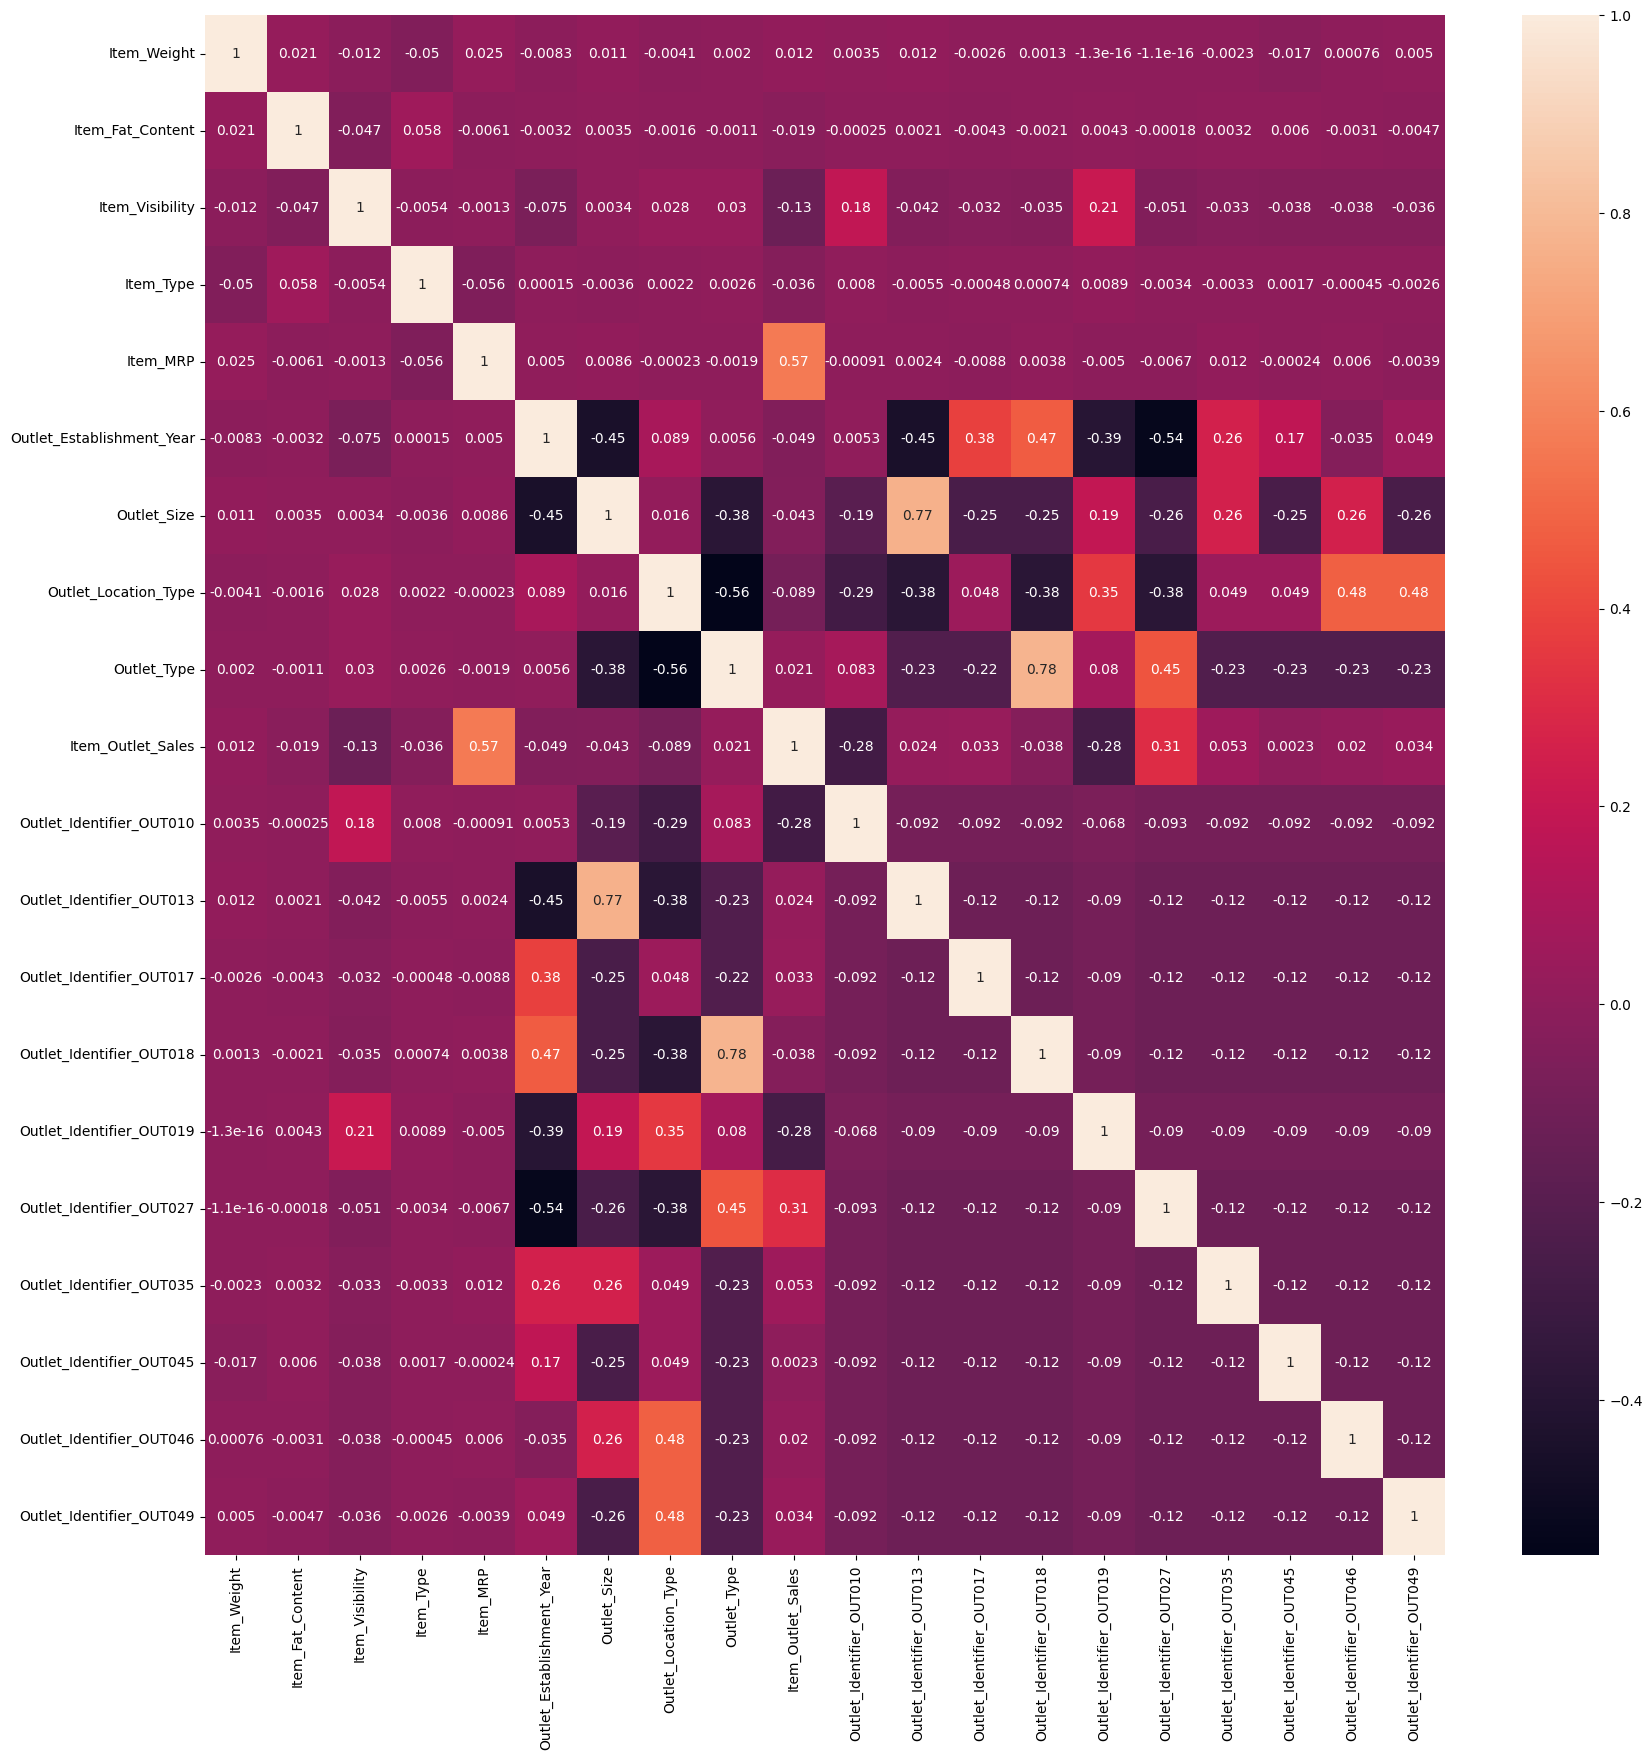

In [158]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

### model training

In [159]:

x=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,1,0.016047,5,249.8092,1999,1,3,1,0,0,0,0,0,0,0,0,0,1
1,5.920,0,0.019278,9,48.2692,2009,1,1,4,0,0,0,1,0,0,0,0,0,0
2,17.500,1,0.016760,10,141.6180,1999,1,3,1,0,0,0,0,0,0,0,0,0,1
3,19.200,0,0.000000,1,182.0950,1998,1,1,2,1,0,0,0,0,0,0,0,0,0
4,8.930,1,0.000000,3,53.8614,1987,3,1,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,2,214.5218,1987,3,1,1,0,1,0,0,0,0,0,0,0,0
8519,8.380,0,0.046982,7,108.1570,2002,1,2,1,0,0,0,0,0,0,0,1,0,0
8520,10.600,1,0.035186,8,85.1224,2004,2,2,1,0,0,0,0,0,0,1,0,0,0
8521,7.210,0,0.145221,2,103.1332,2009,1,1,4,0,0,0,1,0,0,0,0,0,0


In [160]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [161]:
# train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [162]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
913,15.350000,1,0.161350,9,196.6768,1998,1,1,2,1,0,0,0,0,0,0,0,0,0
3334,20.350000,1,0.039236,3,127.2678,1987,3,1,1,0,1,0,0,0,0,0,0,0,0
2476,12.857645,1,0.026770,3,77.0354,1985,1,1,3,0,0,0,0,0,1,0,0,0,0
5502,14.800000,1,0.019477,8,193.0794,2004,2,2,1,0,0,0,0,0,0,1,0,0,0
3291,13.500000,0,0.160624,1,147.0102,2007,1,2,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,7.905000,1,0.016759,2,250.4408,1998,1,1,2,1,0,0,0,0,0,0,0,0,0
3714,6.465000,1,0.124403,6,266.1884,1987,3,1,1,0,1,0,0,0,0,0,0,0,0
7409,19.750000,1,0.041449,1,116.5466,2002,1,2,1,0,0,0,0,0,0,0,1,0,0
3325,16.200000,1,0.063017,6,100.3700,2004,2,2,1,0,0,0,0,0,0,1,0,0,0


In [163]:
y_train

913      591.2304
3334    1017.3424
2476    2332.2974
5502    3901.5880
3291    2770.3938
          ...    
278      500.6816
3714    5299.7680
7409    2828.3184
3325     998.7000
5787    3866.9664
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [164]:
# creating instance of model
model=LinearRegression()

In [165]:
# firiing model
model.fit(x_train,y_train)

LinearRegression()

In [166]:
y_pre=model.predict(x_test)
y_pre

array([2064.62054785, 1772.22423376,  948.04100805, ..., 2059.03048211,
       1322.0370557 , -435.22080019])

In [167]:
residule=(y_test-y_pre)
residule

4294    -117.155548
7676    1413.628766
364     -765.611808
7314     -60.610976
6421    -365.393624
           ...     
3438    -292.769974
21       269.822437
3448   -1343.961282
401     -895.925056
7293     613.655200
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [168]:
### evalution metric 

In [169]:
# evalution on the testing data
y_pre=model.predict(x_test)
MSE=mean_squared_error(y_pre,y_test)
print("MSE",MSE)
RMSE=np.sqrt(MSE)
print("RMSE",RMSE)
MAE=mean_absolute_error(y_pre,y_test)
print("MAE",MAE)
r2=r2_score(y_pre,y_test)
print("r2",r2)

MSE 1231841.589681901
RMSE 1109.8835928519266
MAE 825.8803344666815
r2 0.26772940158954806


In [170]:
# evalution on the training data
y_pre_train=model.predict(x_train)
MSE=mean_squared_error(y_pre_train,y_train)
print("MSE",MSE)
RMSE=np.sqrt(MSE)
print("RMSE",RMSE)
MAE=mean_absolute_error(y_pre_train,y_train)
print("MAE",MAE)
r2=r2_score(y_pre_train,y_train)
print("r2",r2)

MSE 1281608.0932889252
RMSE 1132.0813103699422
MAE 838.0271437843674
r2 0.212168846396524


In [171]:
## testing on the single user input

In [172]:
columns=x.columns
print(columns)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'],
      dtype='object')


In [84]:
x.head(1).T

,0
Item_Weight,9.300000
Item_Fat_Content,1.000000
Item_Visibility,0.016047
Item_Type,5.000000
Item_MRP,249.809200
Outlet_Establishment_Year,1999.000000
Outlet_Size,1.000000
Outlet_Location_Type,3.000000
Outlet_Type,1.000000
Outlet_Identifier_OUT010,0.000000


In [141]:
project_data={"Item_Fat_Content":Item_Fat_Content_value,"Item_Type":Item_Type_value,
             "Outlet_Size":Outlet_Size_value,"Outlet_Location_Type":Outlet_Location_Type_value,
            "Outlet_Type":Outlet_Type_value,"column":list(columns)}

In [142]:
Item_Type_value

{'Fruits and Vegetables': 1,
 'Snack Foods': 2,
 'Household': 3,
 'Frozen Foods': 4,
 'Dairy': 5,
 'Canned': 6,
 'Baking Goods': 7,
 'Health and Hygiene': 8,
 'Soft Drinks': 9,
 'Meat': 10,
 'Breads': 11,
 'Hard Drinks': 12,
 'Others': 13,
 'Starchy Foods': 14,
 'Breakfast': 15,
 'Seafood': 16}

In [143]:
Outlet_Size_value

{'Medium': 1, 'Small': 2, 'High': 3}

In [144]:
Outlet_Location_Type_value

{'Tier 3': 1, 'Tier 2': 2, 'Tier 1': 3}

In [145]:
Outlet_Type_value

{'Supermarket Type1': 1,
 'Grocery Store': 2,
 'Supermarket Type3': 3,
 'Supermarket Type2': 4}

In [146]:
Item_Fat_Content_value

{'Low Fat': 1, 'Regular': 0, 'LF': 1, 'reg': 0, 'low fat': 1}

In [148]:
Item_Weight=9.300000
Item_Fat_Content='Low Fat'
Item_Visibility=0.016047
Item_Type='Household'
Item_MRP=249.809200
Outlet_Establishment_Year=1999.000000
Outlet_Size='Medium'
Outlet_Location_Type='Tier 3'
Outlet_Type='Supermarket Type1'
Outlet_Identifier="OUT049"
Outlet_Identifier_col="Outlet_Identifier_"+Outlet_Identifier
print(Outlet_Identifier_col)


Outlet_Identifier_OUT049


In [149]:
array=np.zeros(len(project_data["column"]),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [150]:
array[0]=Item_Weight
array[1]=project_data["Item_Fat_Content"][Item_Fat_Content]
array[2]=Item_Visibility
array[3]=project_data["Item_Type"][Item_Type]
array[4]=Item_MRP
array[5]=Outlet_Establishment_Year
array[6]=project_data["Outlet_Size"][Outlet_Size]
array[7]=project_data["Outlet_Location_Type"][Outlet_Location_Type]
array[8]=project_data["Outlet_Type"][Outlet_Type]
array[project_data["column"].index(Outlet_Identifier_col)]=1

In [155]:
item_outlet_sales=model.predict([array])[0]
print(f" The item outlet sales {np.around(item_outlet_sales,2)} Rs-\ only ")

 The item outlet sales 4514.34 Rs-\ only 


In [ ]:
## utils file
import pickle
import json
import pandas as pd
import numpy as np
import config


class MedicalInsurance():
    def __init__(self, symboling,
  normalized-losses,
  fuel-type,
  aspiration,
  num-of-doors,
  drive-wheels,
  engine-location,
  wheel-base,
  length,
  width,
  height,
  curb-weight,
  num-of-cylinders,
  engine-size,
  bore,
  stroke,
  compression-ratio,
  horsepower,
  peak-rpm,
  city-mpg,
  highway-mpg,body-style,
       engine-type, 
       fuel-system):
        self.symboling = symboling
        self.normalized_losses = normalized_losses
        self.fuel_type = fuel_type
        self.aspiration = aspiration
        self.num_of_doors = num_of_doors
        self.drive_wheels = drive_wheels
        self.engine_location = engine_location
        self.wheel_base = wheel_base
        self.length = length
        self.width = width
        self.height = height
        self.curb_weight = curb_weight
        self.num_of_cylinders = num_of_cylinders
        self.engine_size = engine_size
        self.bore = bore
        self.stroke = stroke
        self.compression_ratio = compression_ratio
        self.horsepower = horsepower
        self.peak_rpm = peak_rpm
        self.city_mpg = city_mpg
        self.highway_mpg = highway_mpg
        self.body_style = "body-style_"+body_style
        self.engine_type = "engine-type_"+engine_type
        self.fuel_system = "fuel-system_"+fuel_system

    def load_model(self):
        with open("linear_reg.pkl", "rb") as f:
            self.model = pickle.load(f)

        with open(, "r") as f:
            self.json_data = json.load(f)

    def get_predicted_price(self):

        self.load_model()  # Calling load_model method to get model and json_data

        body_style_index = self.json_data['column'].index(self.body_style)
        engine_type_index = self.json_data['column'].index(self.engine_type)
        fuel_system_index = self.json_data['column'].index(self.fuel_system)

        array = np.zeros(len(self.json_data['column']))

        array[0]=self.symboling
        array[1]=self.normalized_losses
        array[2]=self.json_data['fuel_type_value'][self.fuel_type]
        array[3]=self.json_data['aspiration_value'][self.aspiration]
        array[4]=self.json_data['num_of_doors_value'][self.num_of_doors]
        array[5]=self.json_data['drive_wheels_value'][self.drive_wheels]
        array[6]=self.engine_location
        array[7]=self.wheel_base
        array[8]=self.length
        array[9]=self.width
        array[10]=self.curb_weight
        array[11]=self.num_of_cylinders
        array[12]=self.engine_size
        array[13]=self.bore
        array[14]=self.stroke
        array[15]=self.compression_ratio
        array[16]=self.horsepower
        array[17]=self.peak_rpm
        array[18]=self.city_mpg
        array[19]=self.highway_mpg

        array[body_style_index]=1
        array[engine_type_index]=1
        array[fuel_system_index]=1

        print("Test Array -->\n",array)
        predicted_charges = self.model.predict([array])[0]
        print("predicted_car",predicted_charges)
        return np.around(predicted_charges, 2)


if __name__ == "__main__":
    symboling=3.00
    normalized_losses=115.00
    fuel_type="gas"
    aspiration="turbo"
    num_of_doors="four"
    drive_wheels="4wd"
    engine_location=1.00
    wheel_base=88.60
    length=168.80
    width=64.10
    height=48.80
    curb_weight=2548.00
    num_of_cylinders=4.00
    engine_size=130.00
    bore=3.47
    stroke=2.68
    compression_ratio=9.00
    horsepower=111.00
    peak_rpm=5000.00
    city_mpg=21.00
    highway_mpg=27.00

    # one hot encoded values
    body_style="sedan"
    engine_type="dohc"
    fuel_system="mpfi"

    med_ins = MedicalInsurance(symboling, normalized_losses, fuel_type, aspiration,
       num_of_doors, drive_wheels,engine_location,wheel_base,
       length, width,height,curb_weight,num_of_cylinders,
       engine_size,bore,stroke,compression_ratio,horsepower,
       peak_rpm,city_mpg,highway_mpg,body_style,
       engine_type, 
       fuel_system)
    charges = med_ins.get_predicted_price()
    print()
    print(f"Predicted Charges for Medical Insurance is {charges}/- Rs. Only")